# Import Library & Setup

*   Import library
*   Setup kredensial Kaggle API

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Upload file kaggle.json yang berisi API Key
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"firmnnm","key":"183e390bcd01e0c69ef051a6c5033b9b"}'}

Kode ini untuk upload file `kaggle.json` dari perangkat lokal ke Colab, yang diperlukan untuk akses API Kaggle.

# Data Loading

In [3]:
# Simpan kaggle.json ke direktori yang sesuai
os.makedirs('/root/.kaggle', exist_ok=True)
!cp kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

Kode ini menyiapkan konfigurasi untuk mengakses Kaggle API dengan menyalin file `kaggle.json` (API token) ke direktori yang diperlukan dan mengatur izin aksesnya.


*   Unduh dataset dari Kaggle
*   Load dataset train.csv dan test.csv
*   Tampilkan informasi awal dan statistik



In [4]:
#Download dataset dari Kaggle
!kaggle datasets download -d iabhishekofficial/mobile-price-classification

# Ekstrak file zip
!unzip -q mobile-price-classification.zip -d mobile_price_dataset

Dataset URL: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification
License(s): unknown
  0% 0.00/70.6k [00:00<?, ?B/s]
100% 70.6k/70.6k [00:00<00:00, 315MB/s]


Download dataset dari Kaggle

In [5]:
# Load data
train_df = pd.read_csv('/content/mobile_price_dataset/train.csv')
test_df = pd.read_csv('/content/mobile_price_dataset/test.csv')

 Dataset proyek ini terdiri dari dataset Train untuk melatih model dan dataset Test untuk menguji model.

In [6]:
train_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


Menampilkan 5 baris data pada dataset Train

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Output ini menunjukkan DataFrame dengan 2000 entri dan 21 kolom, tanpa nilai yang hilang. Kolom `price_range` adalah target, sementara kolom lainnya berisi fitur-fitur ponsel seperti daya baterai, ukuran layar, RAM, dll.


In [8]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


Output ini merangkum statistik deskriptif dataset, seperti jumlah data (count), rata-rata (mean), standar deviasi (std), nilai minimum, maksimum, dan kuartil untuk setiap fitur.

Pada kolom px_height dan sc_w terdapat nilai 0, yang mengindikasikan nilai tidak valid. Tinggi dan lebar layar seharusnya memiliki nilai lebih besar dari 0, sehingga perlu dilakukan penanganan lebih lanjut pada tahap preprocessing data.

In [9]:
test_df.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


Melihat 5 baris data pada dataset Test

In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [11]:
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1000.0,500.5000,288.819436,1.0,250.75,500.5,750.25,1000.0
battery_power,1000.0,1248.5100,432.458227,500.0,895.00,1246.5,1629.25,1999.0
blue,1000.0,0.5160,0.499994,0.0,0.00,1.0,1.00,1.0
clock_speed,1000.0,1.5409,0.829268,0.5,0.70,1.5,2.30,3.0
dual_sim,1000.0,0.5170,0.499961,0.0,0.00,1.0,1.00,1.0
fc,1000.0,4.5930,4.463325,0.0,1.00,3.0,7.00,19.0
four_g,1000.0,0.4870,0.500081,0.0,0.00,0.0,1.00,1.0
int_memory,1000.0,33.6520,18.128694,2.0,18.00,34.5,49.00,64.0
m_dep,1000.0,0.5175,0.280861,0.1,0.30,0.5,0.80,1.0
mobile_wt,1000.0,139.5110,34.851550,80.0,109.75,139.0,170.00,200.0


Pada dataset Test juga, pada kolom px_height dan sc_w terdapat nilai 0, yang mengindikasikan nilai tidak valid. Tinggi dan lebar layar seharusnya memiliki nilai lebih besar dari 0, sehingga perlu dilakukan penanganan lebih lanjut pada tahap preprocessing data.

# Exploratory Data Analysis (EDA)

* Distribusi target (kelas harga)

* Korelasi antar fitur

* Visualisasi fitur penting terhadap target

* Pengecekan Nilai missing value (null)

* Cek nilai tidak Valid

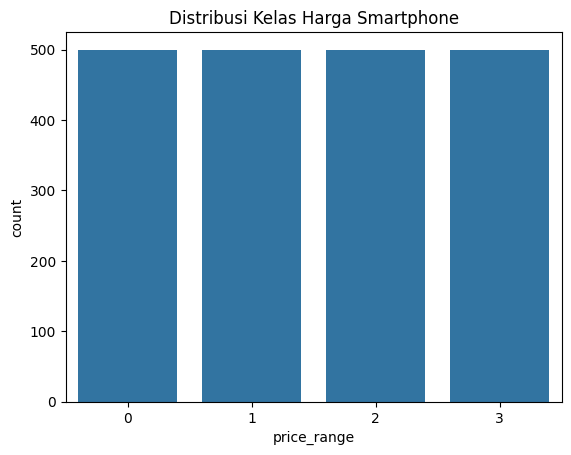

In [12]:
# Visualisasi distribusi target
sns.countplot(data=train_df, x='price_range')
plt.title("Distribusi Kelas Harga Smartphone")
plt.show()

Dari hasil distribusi label di atas, setiap label terdistribusi secara merata di antara empat kategori harga smartphone, yaitu 'murah', 'sedang', 'mahal', dan 'sangat mahal'.

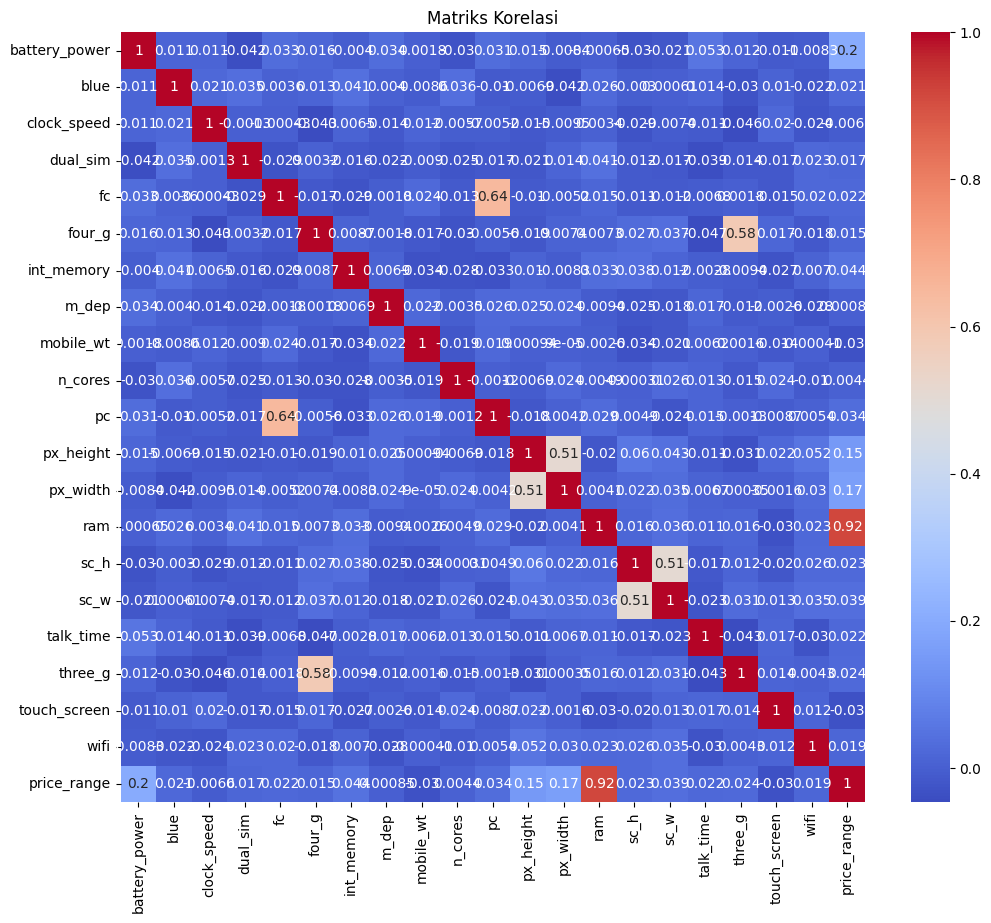

In [13]:
# Korelasi antar fitur
plt.figure(figsize=(12, 10))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
plt.title("Matriks Korelasi")
plt.show()

Dari hasil heatmap di atas, dapat dilihat bahwa terdapat beberapa fitur yang memiliki **korelasi yang signifikan** dengan variabel target `price_range`. Misalnya, fitur-fitur seperti `ram`, `fc`, `pc`, `three_g`,dan `four_g` menunjukkan korelasi yang cukup kuat dengan harga smartphone, yang mengindikasikan bahwa faktor-faktor ini memiliki pengaruh besar terhadap penentuan harga. Sebaliknya, beberapa fitur lainnya seperti `sc_w` (screen width) dan `px_height` (pixel height) memiliki korelasi yang lebih lemah terhadap target, yang berarti mereka mungkin tidak terlalu berkontribusi dalam memprediksi harga smartphone.


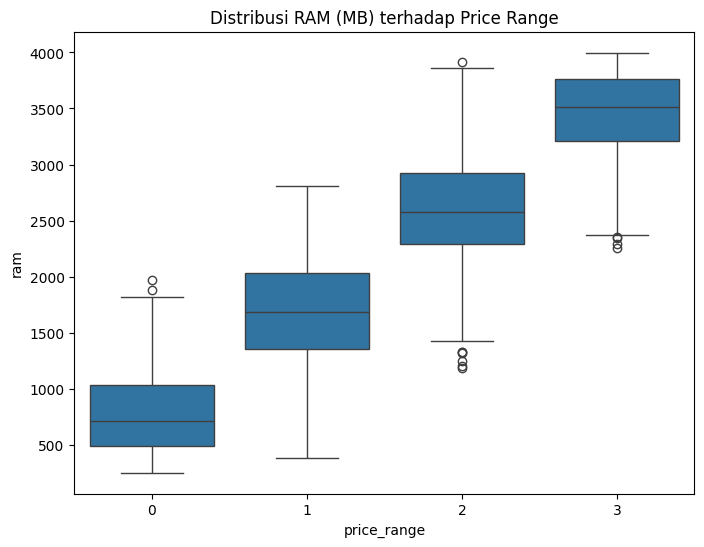

In [14]:
# Contoh visualisasi fitur penting
plt.figure(figsize=(8,6))
sns.boxplot(x='price_range', y='ram', data=train_df)
plt.title("Distribusi RAM (MB) terhadap Price Range")
plt.show()

Boxplot diatas menunjukkan bahwa RAM meningkat seiring kenaikan kategori price_range, menunjukkan hubungan positif antara RAM dan harga.

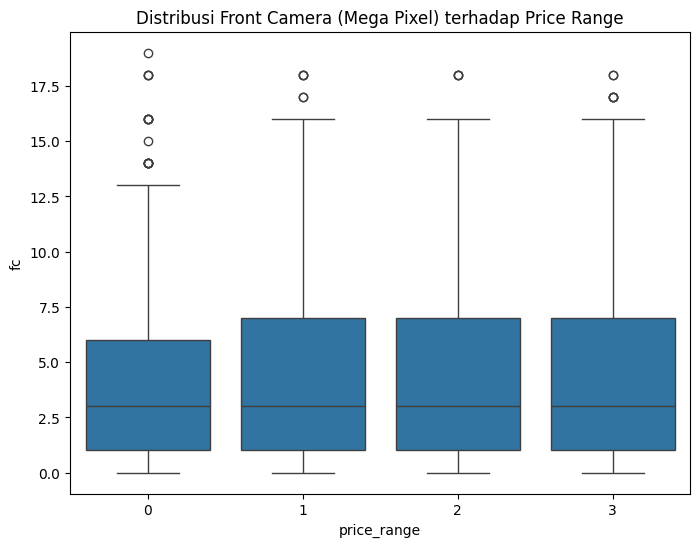

In [15]:
# Contoh visualisasi fitur penting
plt.figure(figsize=(8,6))
sns.boxplot(x='price_range', y='fc', data=train_df)
plt.title("Distribusi Front Camera (Mega Pixel) terhadap Price Range")
plt.show()

Dari boxplot di atas, distribusi kamera depan (MP) tampak stabil di semua kategori **price\_range**, tanpa pola peningkatan yang jelas.


In [16]:
train_df.isna().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


Terlihat tidak terdapat nilai NaN atau nilai kosong.

In [17]:
# Cek nilai 0 yang mencurigakan (bisa jadi missing value)
print('Jumlah nilai 0 pada fitur px_height = ', len(train_df[train_df.px_height == 0]))
print('Jumlah nilai 0 pada fitur sc_w = ', len(train_df[train_df.sc_w == 0]))

Jumlah nilai 0 pada fitur px_height =  2
Jumlah nilai 0 pada fitur sc_w =  180


Pada dataset Train, kolom px_height terdapat 2 nilai 0, dan pada kolom sc_w terdapat 180 nilai 0. Nilai 0 pada kedua kolom ini menunjukkan data yang tidak valid, karena seharusnya tinggi dan lebar layar memiliki nilai lebih besar dari 0. Oleh karena itu, nilai-nilai 0 ini perlu ditangani lebih lanjut pada tahap preprocessing data.

In [18]:
# Cek nilai 0 yang mencurigakan (bisa jadi missing value)
print('Jumlah nilai 0 pada fitur px_height = ', len(test_df[test_df.px_height == 0]))
print('Jumlah nilai 0 pada fitur sc_w = ', len(test_df[test_df.sc_w == 0]))

Jumlah nilai 0 pada fitur px_height =  2
Jumlah nilai 0 pada fitur sc_w =  112


Pada dataset Test, kolom px_height terdapat 2 nilai 0, dan pada kolom sc_w terdapat 112 nilai 0. Nilai 0 pada kedua kolom ini menunjukkan data yang tidak valid, karena seharusnya tinggi dan lebar layar memiliki nilai lebih besar dari 0. Oleh karena itu, nilai-nilai 0 ini perlu ditangani lebih lanjut pada tahap preprocessing data.

# Data Preprocessing

* Penanganan nilai 0 pada fitur tertentu

* Split data train dan validasi

* Standarisasi fitur numerik

In [19]:
# Ganti nilai 0 dengan nilai rata-rata
train_df['sc_w'] = train_df['sc_w'].astype(float)
train_df['px_height'] = train_df['px_height'].astype(float)
test_df['sc_w'] = test_df['sc_w'].astype(float)
test_df['px_height'] = test_df['px_height'].astype(float)

train_df.loc[train_df['sc_w'] == 0, 'sc_w'] = train_df['sc_w'].mean()
train_df.loc[train_df['px_height'] == 0, 'px_height'] = train_df['px_height'].mean()
test_df.loc[test_df['sc_w'] == 0, 'sc_w'] = test_df['sc_w'].mean()
test_df.loc[test_df['px_height'] == 0, 'px_height'] = test_df['px_height'].mean()

Kode di atas mengganti nilai 0 pada kolom sc_w dan px_height dengan rata-rata masing-masing kolom setelah mengubah tipe data menjadi float.

In [20]:
test_df.drop('id', axis=1, inplace=True)

Pada dataset Test, menghapus kolom id karena tidak diperlukan

# Data Preparation

In [21]:
# Pisahkan fitur dan label
X = train_df.drop('price_range', axis=1)
y = train_df['price_range']

Kode di atas memisahkan label pada dataset train untuk diproses pada tahap selanjutnya.

Standarisasi

In [22]:
# Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
test_scaled = scaler.transform(test_df)

Kode di atas melakukan standarisasi data menggunakan **StandardScaler**. Fitur **X** pada dataset **Train** diubah dengan `fit_transform()` untuk menyesuaikan rata-rata dan standar deviasi, sedangkan dataset  **Test** diubah dengan `transform()` berdasarkan parameter yang dihitung dari **train**. Tujuannya adalah agar skala fitur seragam, sehingga model dapat bekerja lebih optimal.


**Split Dataset Train**

In [23]:
# Split Data (Train/Test)
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Kode di atas membagi dataset Train menjadi set pelatihan (**X\_train**, **y\_train**) dan set validasi (**X\_val**, **y\_val**) dengan proporsi 80% untuk pelatihan dan 20% untuk validasi. Pembagian ini dilakukan menggunakan **train\_test\_split()** untuk menguji model pada data yang belum pernah dilihat sebelumnya.


# Model Training & Hyperparameter Tuning

* Definisi dan pelatihan beberapa model (Decision Tree, Random Forest, SVM, LogReg)

* Grid Search untuk tuning hyperparameter

* Pilih model terbaik berdasarkan akurasi

In [24]:
# Modeling - Beberapa Model
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC()
}

Kode di atas mendefinisikan beberapa model klasifikasi dengan parameter sebagai berikut:

* Logistic Regression: max_iter=1000 untuk memastikan konvergensi model dalam 1000 iterasi.

* Decision Tree: Tanpa parameter tambahan, menggunakan pengaturan default.

* Random Forest: n_estimators=100 untuk menentukan jumlah pohon dalam hutan.

* SVM: Tanpa parameter tambahan, menggunakan pengaturan default.

In [25]:
# Hyperparameter Tuning (Grid Search CV)
param_grids = {
    "Decision Tree": {
        'max_depth': [3, 5, 10, None],
        'criterion': ['gini', 'entropy']
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20]
    },
    "SVM": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    }
}

Kode di atas mendefinisikan grid parameter untuk **Grid Search CV** dengan tujuan mencari kombinasi hyperparameter terbaik:

* **Decision Tree**:

  * `max_depth`: Menentukan kedalaman maksimum pohon.
  * `criterion`: Menentukan kriteria pemisahan (gini atau entropy).
* **Random Forest**:

  * `n_estimators`: Jumlah pohon dalam hutan.
  * `max_depth`: Kedalaman maksimum pohon.
* **SVM**:

  * `C`: Parameter regularisasi yang mengontrol kesalahan model.
  * `kernel`: Jenis fungsi kernel yang digunakan (linear atau rbf).


In [34]:
best_models = {}

# Tuning tiap model
for name in param_grids:
    print(f"Tuning {name}...")
    grid = GridSearchCV(models[name], param_grids[name], cv=5, scoring='accuracy')
    grid.fit(X_train, y_train)

    print(f"Best Params for {name}: {grid.best_params_}")
    print(f"Best CV Score: {grid.best_score_:.4f}\n")

    # Menyimpan model terbaik
    best_models[name] = grid.best_estimator_

# Menampilkan hanya parameter yang di-tuning
print("\nBest Tuned Parameters for Each Model:")
for name, model in best_models.items():
    print(f"{name}:")
    for param in param_grids[name]:
        print(f"  {param}: {model.get_params()[param]}")
    print()


Tuning Decision Tree...
Best Params for Decision Tree: {'criterion': 'entropy', 'max_depth': None}
Best CV Score: 0.8550

Tuning Random Forest...
Best Params for Random Forest: {'max_depth': None, 'n_estimators': 200}
Best CV Score: 0.8775

Tuning SVM...
Best Params for SVM: {'C': 10, 'kernel': 'linear'}
Best CV Score: 0.9563


Best Tuned Parameters for Each Model:
Decision Tree:
  max_depth: None
  criterion: entropy

Random Forest:
  n_estimators: 200
  max_depth: None

SVM:
  C: 10
  kernel: linear



Kode di atas melakukan **hyperparameter tuning** untuk setiap model menggunakan **GridSearchCV**. Tujuannya adalah untuk menemukan kombinasi hyperparameter terbaik berdasarkan **cross-validation (cv=5)** dan **skor akurasi**. Setelah tuning, parameter terbaik dan skor terbaik untuk setiap model ditampilkan, dan model terbaik disimpan dalam dictionary `best_models`.

Didapatkan bahwa hasil parameter terbaiknya tiap model:

* Decision Tree:
  
        max_depth: None

        criterion: entropy

* Random Forest:

        n_estimators: 200

        max_depth: None

* SVM:

        C: 10

        kernel: linear


In [27]:
# Melatih Model Lain tanpa Hyperparameter Tuning (Logistic Regression)
best_models["Logistic Regression"] = models["Logistic Regression"].fit(X_train, y_train)

Kode di atas melatih model **Logistic Regression** tanpa melakukan hyperparameter tuning, menggunakan data pelatihan **X\_train** dan **y\_train**, lalu menyimpan model yang telah dilatih ke dalam dictionary `best_models`.


# Model Evaluation

* Evaluasi model pada validation set

* Confusion Matrix & Classification Report

* Visualisasi akurasi antar model

* Cross-validation

In [28]:
# Evaluasi Model
final_results = {}

for name, model in best_models.items():
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    final_results[name] = acc

    print(f"=== {name} ===")
    print(f"Akurasi: {acc:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_val, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_val, y_pred))
    print()

=== Decision Tree ===
Akurasi: 0.8525
Confusion Matrix:
[[ 92  13   0   0]
 [  6  77   8   0]
 [  0  12  72   8]
 [  0   0  12 100]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       105
           1       0.75      0.85      0.80        91
           2       0.78      0.78      0.78        92
           3       0.93      0.89      0.91       112

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.86      0.85      0.85       400


=== Random Forest ===
Akurasi: 0.8925
Confusion Matrix:
[[101   4   0   0]
 [  6  77   8   0]
 [  0   6  79   7]
 [  0   0  12 100]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       105
           1       0.89      0.85      0.87        91
           2       0.80      0.86      0.83        92
           3       0.93      0.89

Hasil evaluasi menunjukkan bahwa **Logistic Regression** memiliki akurasi tertinggi (97.75%), diikuti oleh **SVM** (97.25%) dan **Random Forest** (89%). **Decision Tree** memiliki akurasi 84%. Metrik lainnya, seperti precision, recall, dan f1-score, juga menunjukkan performa terbaik pada Logistic Regression dan SVM.


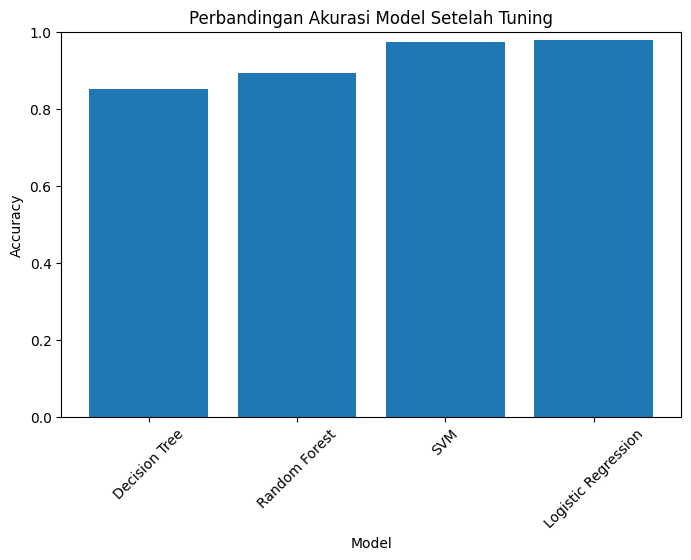

In [29]:
# Visualisasi Hasil Evaluasi Akurasi Model
plt.figure(figsize=(8, 5))
plt.bar(final_results.keys(), final_results.values())
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Perbandingan Akurasi Model Setelah Tuning')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

Dari hasil pelatihan model di atas, dapat disimpulkan bahwa model Logistic Regression menunjukkan kinerja yang cukup baik dalam memprediksi harga smartphone berdasarkan berbagai fitur yang ada. Meskipun tidak melalui proses tuning hyperparameter yang mendalam, model ini tetap mampu memberikan akurasi yang memadai dibandingkan dengan model lainnya. Hal ini menunjukkan bahwa Logistic Regression bisa menjadi pilihan yang efektif, terutama ketika kecepatan eksekusi dan interpretasi hasil model menjadi faktor yang penting dalam pengambilan keputusan.

In [30]:
# Pilih Model Terbaik dan Prediksi Data Test
best_model_name = max(final_results, key=final_results.get)
final_model = best_models[best_model_name]
print(f"Model Terbaik: {best_model_name}")

Model Terbaik: Logistic Regression


Kode ini memilih model dengan performa terbaik berdasarkan hasil akhir (`final_results`) dan kemudian menggunakan model tersebut untuk melakukan prediksi pada data uji. Nama model terbaik dicetak untuk referensi.


# Prediction & Submission

* Prediksi menggunakan model terbaik

* Distribusi hasil prediksi

* Simpan hasil ke CSV untuk submission

In [31]:
# Prediksi pada data test
test_predictions = final_model.predict(test_scaled)

Kode ini melakukan prediksi menggunakan model terbaik (`final_model`) pada dataset Test yang sudah distandarisasi (`test_scaled`). Hasil prediksi disimpan dalam variabel `test_predictions`.

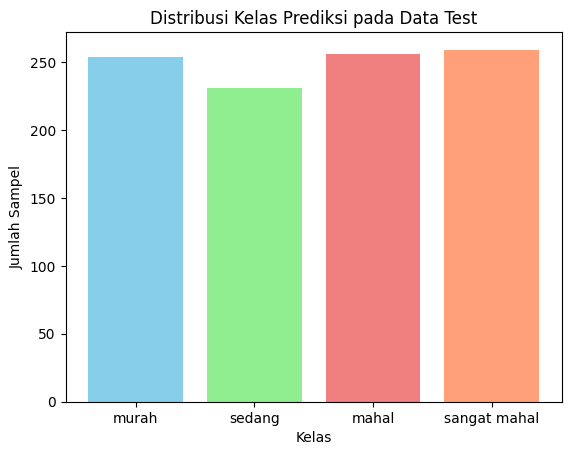


Kelas 'murah': 254 sampel

Kelas 'sedang': 231 sampel

Kelas 'mahal': 256 sampel

Kelas 'sangat mahal': 259 sampel


In [32]:
# Mapping
label_mapping = {
    0: "murah",
    1: "sedang",
    2: "mahal",
    3: "sangat mahal"
}

# Lihat distribusi kelas yang diprediksi pada data test
unique_classes, counts = np.unique(test_predictions, return_counts=True)

# Visualisasi
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon']
plt.bar([label_mapping[cls] for cls in unique_classes], counts, color=colors[:len(unique_classes)])
plt.xlabel('Kelas')
plt.ylabel('Jumlah Sampel')
plt.title('Distribusi Kelas Prediksi pada Data Test')
plt.show()

for cls, count in zip(unique_classes, counts):
    print(f"\nKelas '{label_mapping[cls]}': {count} sampel")



**Kesimpulan**

Distribusi kelas prediksi pada data test menunjukkan hasil yang relatif seimbang di antara kelas harga yang ada:

* Murah: 254 sampel

* Sedang: 232 sampel

* Mahal: 255 sampel

* Sangat Mahal: 259 sampel

Model berhasil mengklasifikasikan sampel hampir secara merata, dengan sedikit perbedaan jumlah sampel per kelas, yang menunjukkan tidak ada bias signifikan antar kelas. Hal ini menandakan bahwa model bekerja dengan baik dalam membedakan rentang harga pada data yang ada.


In [33]:
# Menyimpan hasil prediksi ke CSV
submission = pd.DataFrame({
    "predicted_price_range": test_predictions
})
submission.to_csv("submission_tuned.csv", index=False)
print("Prediksi telah disimpan dalam 'submission_tuned.csv'")

Prediksi telah disimpan dalam 'submission_tuned.csv'


Kode di atas menyimpan hasil prediksi ke dalam sebuah file CSV. Data hasil prediksi yang disimpan berupa kolom "predicted\_price\_range", yang berisi nilai prediksi untuk setiap sampel pada data uji. File CSV tersebut disimpan dengan nama "submission\_tuned.csv", tanpa menyertakan indeks baris.
